Student Name: **Silvina Figueroa**

---

# Final Project IT125 Data Analytics - Spring 23
**Instructor:** Nastassya West

**Project Dataset:** Diabetes prediction dataset

**Source:** https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset



---



# Data Preprocessing

In [3]:
# importing the database (downloaded on my google drive)

import pandas as pd

diabetes = pd.read_csv("/content/drive/MyDrive/SEATTLE CENTRAL/IT 125 Data Analytics/Colab Notebooks/diabetes_prediction_dataset.csv")

In [4]:
# Getting the database general information
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Analysing further the values of the dataset

print(diabetes)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

In [6]:
# Confirming we don't have any null values (double check)

diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

From the printed data, we can see:

*   hypertension , heart_disease and diabetes are boolean variables
*   age is a float64, but should be a int64 (I'll validate this).
*   gender and smoking_history are categorical variables
*   blood_glucose_level, HbA1c_level, bmi are numerical variables




---



In [7]:
# validating the information of the colum, it seems we have indeed ages with decimal values
diabetes.age.describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [8]:
# age decimal validation

age_decimal = diabetes[diabetes["age"].apply(lambda x: str(x).split(".")[1] != "0")]

print(age_decimal)

# It seems the decimal are used for children, se we won't modify the column
age_decimal.describe()

       gender   age  hypertension  heart_disease smoking_history    bmi  \
155    Female  0.08             0              0         No Info  14.43   
218    Female  0.56             0              0         No Info  16.85   
241      Male  0.88             0              0         No Info  17.49   
268    Female  0.16             0              0         No Info  12.15   
396      Male  0.16             0              0         No Info  14.35   
...       ...   ...           ...            ...             ...    ...   
99536  Female  0.40             0              0         No Info  16.66   
99629  Female  0.64             0              0         No Info  17.58   
99778  Female  0.32             0              0         No Info  12.26   
99911  Female  0.32             0              0         No Info  18.37   
99916  Female  1.48             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
155            6.5                  160        

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,2018.000000,2018.0,2018.0,2018.000000,2018.000000,2018.000000,2018.0
mean,1.053816,0.0,0.0,17.926333,5.384688,133.236868,0.0
std,0.535323,0.0,0.0,3.994270,0.973505,33.851134,0.0
min,0.080000,0.0,0.0,10.210000,3.500000,80.000000,0.0
25%,0.560000,0.0,0.0,15.420000,4.575000,100.000000,0.0
50%,1.160000,0.0,0.0,17.060000,5.700000,140.000000,0.0
75%,1.560000,0.0,0.0,19.055000,6.100000,158.000000,0.0
max,1.880000,0.0,0.0,36.610000,6.600000,200.000000,0.0


In [9]:
# I analized the genre column to determine if we have more than two, and I discovered we have 18 values with genre "Other"

diabetes.gender.value_counts()


Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [10]:
# I check the information of the rest of the columns to be more familiar with the dataset

diabetes.smoking_history.value_counts()


No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [11]:
diabetes.hypertension.value_counts()

0    92515
1     7485
Name: hypertension, dtype: int64

In [12]:
diabetes.heart_disease.value_counts()

0    96058
1     3942
Name: heart_disease, dtype: int64

In [13]:
diabetes.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [14]:
diabetes.bmi.describe()


count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64

In [15]:
diabetes.blood_glucose_level.describe()

#Blood glucose level refers to the amount of glucose in the bloodstream at a given time.

count    100000.000000
mean        138.058060
std          40.708136
min          80.000000
25%         100.000000
50%         140.000000
75%         159.000000
max         300.000000
Name: blood_glucose_level, dtype: float64

In [16]:
diabetes.HbA1c_level.describe()

#HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months.

count    100000.000000
mean          5.527507
std           1.070672
min           3.500000
25%           4.800000
50%           5.800000
75%           6.200000
max           9.000000
Name: HbA1c_level, dtype: float64

In [17]:
#Checking if we have duplicates values

duplicates = diabetes.duplicated().sum()
total_rows = len(diabetes)
percentage_duplicates = (duplicates / total_rows) * 100

print(f"Percentage of duplicate rows: {percentage_duplicates:.2f}%")

Percentage of duplicate rows: 3.85%


In [18]:
# After analysing our data, we will remove the duplicates values to clean our database

diabetes.drop_duplicates(inplace=True)
print(diabetes.duplicated().sum())

0



We don't have missing values in this dataset, but we are going to double check that with the missing matrix and scatterplot

---



<Axes: >

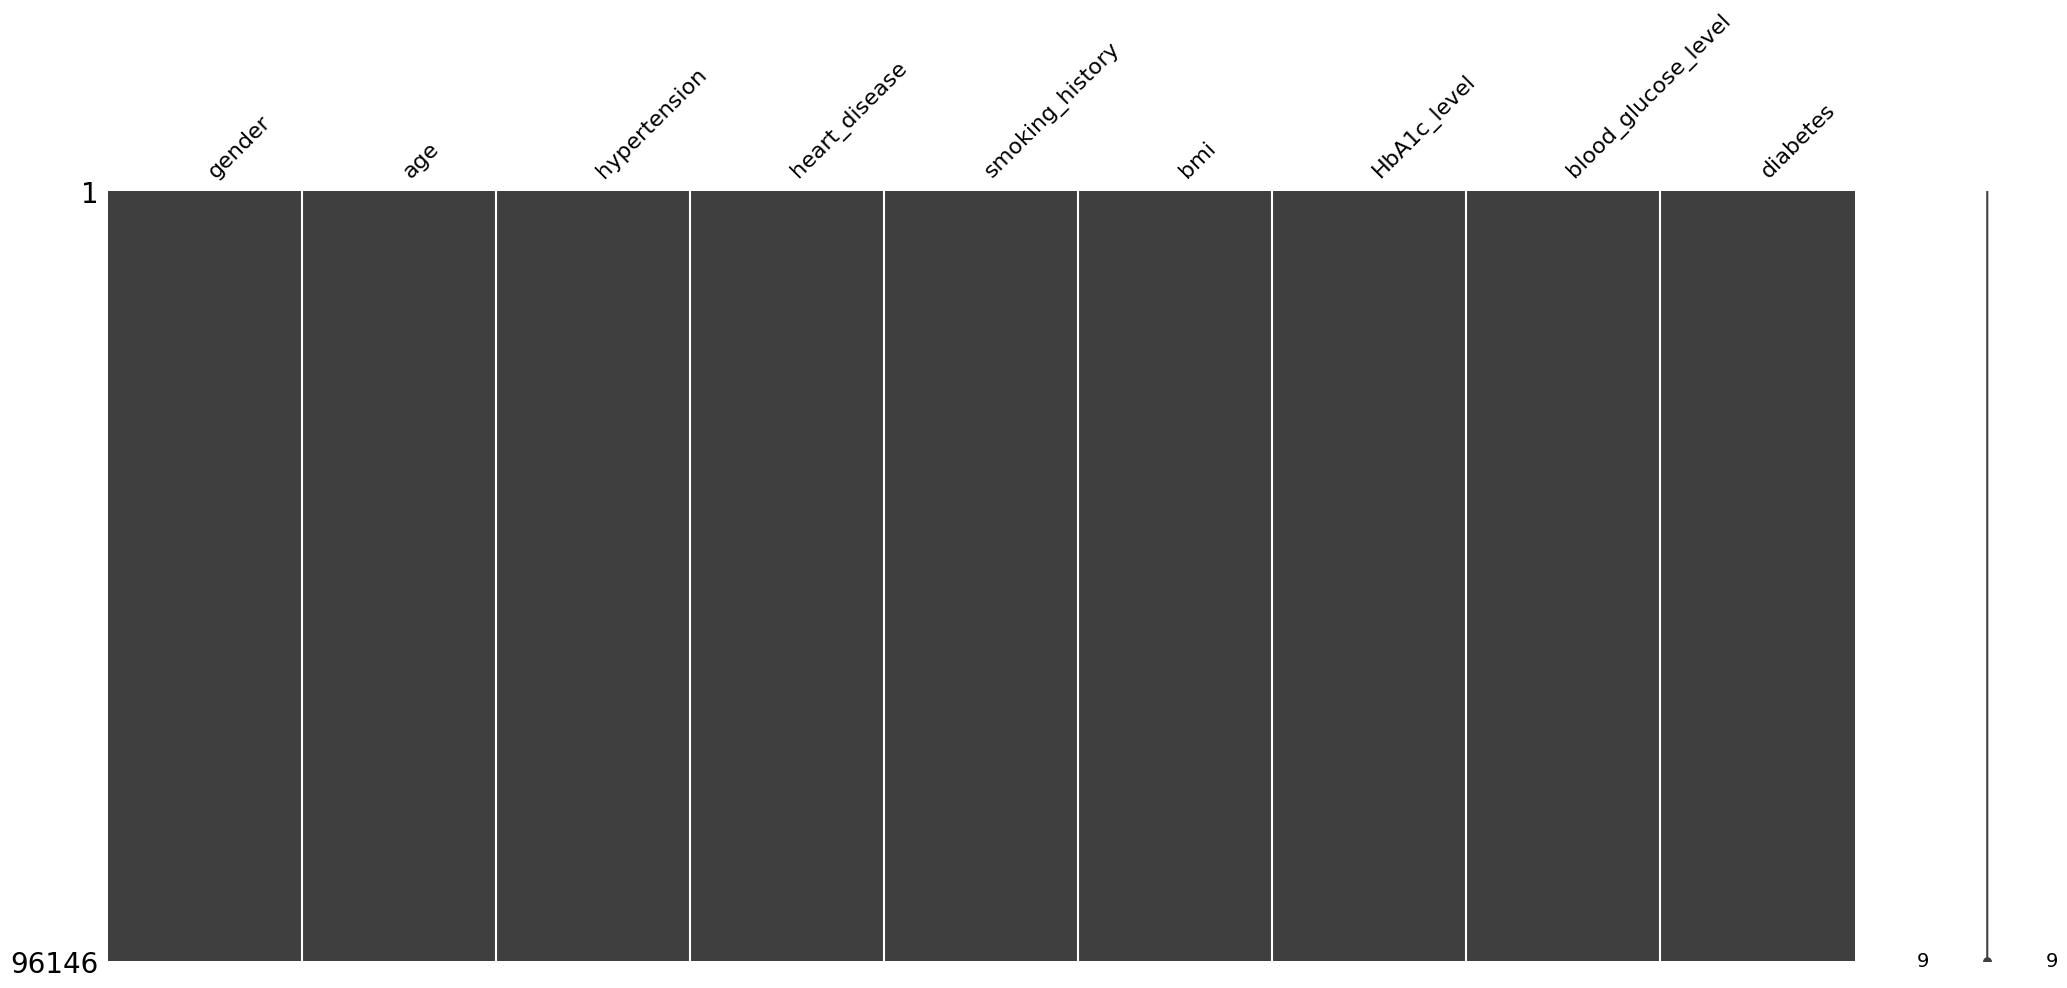

In [19]:
import missingno as msno

msno.matrix(diabetes)

<Axes: xlabel='age', ylabel='bmi'>

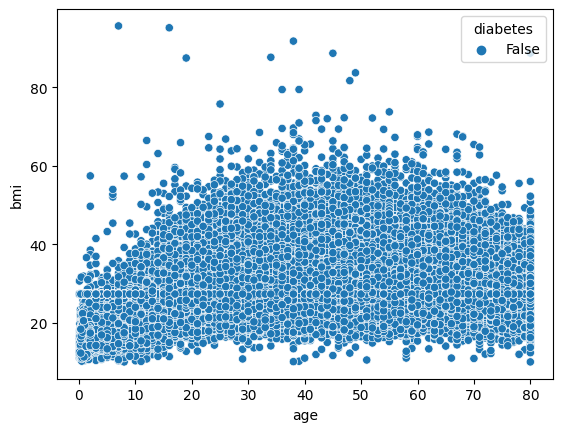

In [20]:
# Scatterplot showing the pattern of missingness of diabetes column across age and bmi

import seaborn as sns

nan_diabetes = diabetes["diabetes"].isnull()
sns.scatterplot(x="age", y="bmi", hue= nan_diabetes, data=diabetes)



---



# Exploratory Data Analysis (EDA)

In [21]:
# When analysing the data, it caught my attention the max number of bmi, so I'll explore this column a bit more

diabetes.bmi.describe()

count    96146.000000
mean        27.321461
std          6.767716
min         10.010000
25%         23.400000
50%         27.320000
75%         29.860000
max         95.690000
Name: bmi, dtype: float64

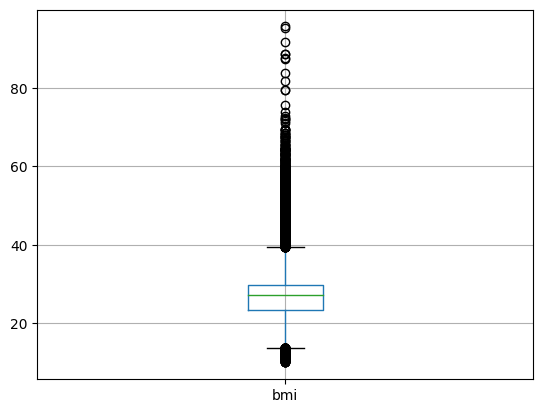

In [22]:
# The boxplot confirms that we have several outliers
# BMI = weight (kg) / (height (m))^2

import matplotlib.pyplot as plt

diabetes.boxplot(column="bmi")
plt.show()

In [23]:
# Calculating the inter quartile range to find outliers of bmi column

q1 = diabetes["bmi"].quantile(0.25)
q3 = diabetes["bmi"].quantile(0.75)
iqr = q3 - q1

print(iqr)

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(f"Outliers: values lower than {lower:.2f} and higher than {upper:.2f}")


6.460000000000001
Outliers: values lower than 13.71 and higher than 39.55


In [24]:

extreme_obesity = diabetes[diabetes["bmi"] > 39.55]

extreme_obesity_count = extreme_obesity.value_counts().sum()

print(f'Total extreme obesity {extreme_obesity_count}')
print(extreme_obesity)

Total extreme obesity 4940
       gender   age  hypertension  heart_disease smoking_history    bmi  \
11     Female  54.0             0              0          former  54.70   
39     Female  34.0             0              0           never  56.43   
59     Female  67.0             0              0           never  63.48   
93       Male  38.0             0              0           never  55.61   
98     Female  30.0             0              0         No Info  50.13   
...       ...   ...           ...            ...             ...    ...   
99892  Female  67.0             0              0         No Info  44.39   
99948  Female  56.0             1              0          former  39.62   
99953  Female  59.0             1              0            ever  60.52   
99960  Female  47.0             0              0          former  45.15   
99993  Female  40.0             0              0           never  40.69   

       HbA1c_level  blood_glucose_level  diabetes  
11             6.0  

In [25]:

underweight = diabetes[diabetes["bmi"] < 13.71]

underweight_count = underweight.value_counts().sum()

print(f'Total underweight {underweight_count}')
print(underweight)

Total underweight 414
       gender   age  hypertension  heart_disease smoking_history    bmi  \
264    Female  4.00             0              0         No Info  13.57   
268    Female  0.16             0              0         No Info  12.15   
677    Female  0.88             0              0         No Info  10.30   
824      Male  0.16             0              0         No Info  11.16   
1089     Male  1.64             0              0         No Info  13.12   
...       ...   ...           ...            ...             ...    ...   
98286    Male  9.00             0              0           never  11.44   
98392  Female  3.00             0              0         No Info  13.53   
98965  Female  0.08             0              0         No Info  12.50   
99778  Female  0.32             0              0         No Info  12.26   
99933  Female  5.00             0              0         No Info  13.34   

       HbA1c_level  blood_glucose_level  diabetes  
264            3.5       

In [26]:
bmi_outliers = extreme_obesity_count + underweight_count

print(bmi_outliers)

total_dataset = (diabetes.value_counts().sum())

bmi_outliers_perc = (bmi_outliers / total_dataset) * 100

print(f"Percentage of outliers in the BMI column: {bmi_outliers_perc:.2f}%")


5354
Percentage of outliers in the BMI column: 5.57%


<Axes: >

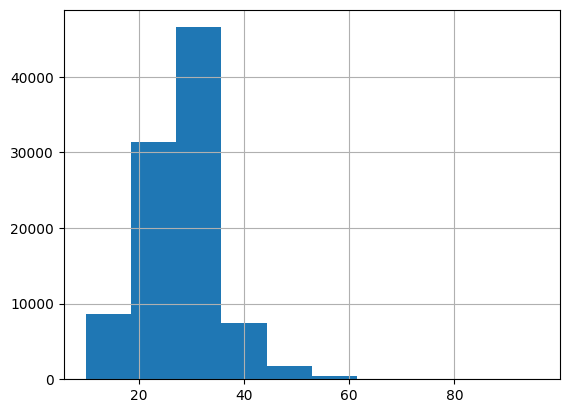

In [27]:
#distribution of BMI values in the dataset
diabetes["bmi"].hist()

BMI lower than 18.5 and higher than 40 are really uncommon and, if they are not a mistake in the data, they can be associated with different underlying conditions more severes than diabetes, so it's importat to decide with someone with domain in the data if they want to keep this values



---



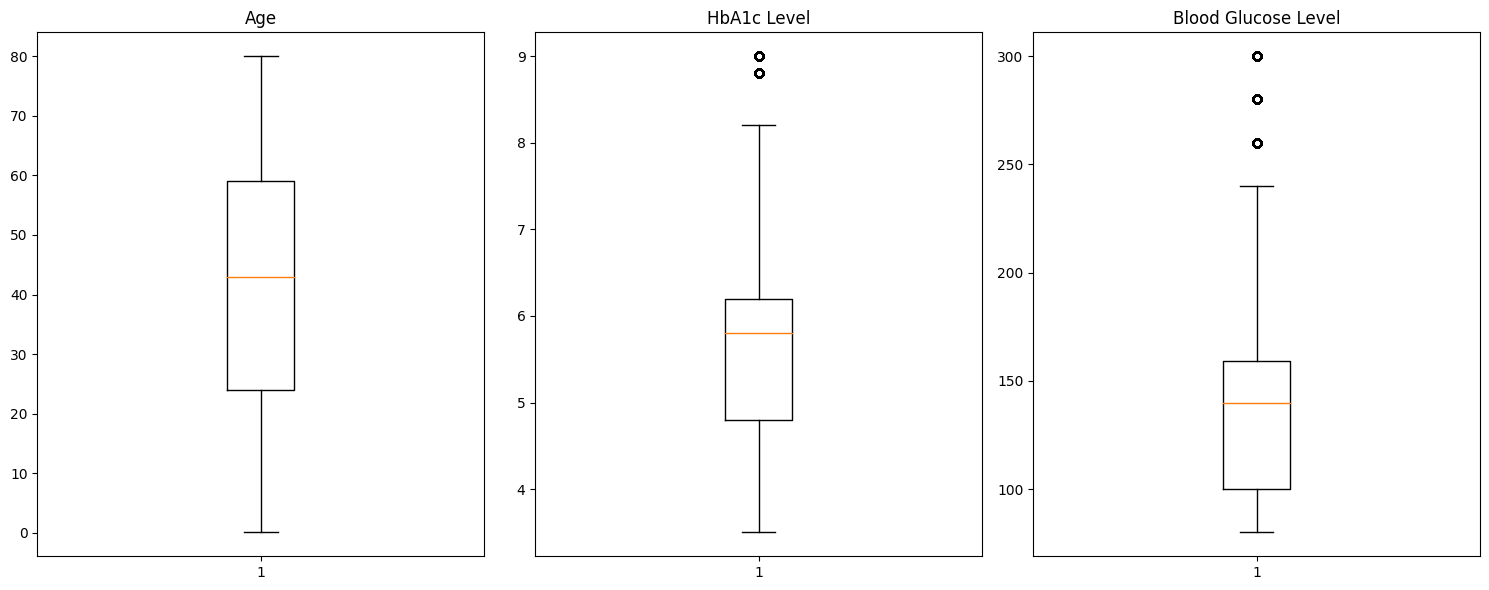

In [28]:
# We can now do further analysis with the rest of the columns and understanding their relationship
# I'm not including here boolean variables because they don't have outliers, we already check if the results are 0 or 1


fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Boxplot 1: Age
axes[0].boxplot(diabetes["age"])
axes[0].set_title("Age")

# Boxplot 2: HbA1c_level
axes[1].boxplot(diabetes["HbA1c_level"])
axes[1].set_title("HbA1c Level")

# Boxplot 3: Blood Glucose Level
axes[2].boxplot(diabetes["blood_glucose_level"])
axes[2].set_title("Blood Glucose Level")

plt.tight_layout()
plt.show()


HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.

---
Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.



In [29]:
# Calculating the inter quartile range to find outliers of HbA1c_level column

q1 = diabetes["HbA1c_level"].quantile(0.25)
q3 = diabetes["HbA1c_level"].quantile(0.75)
iqr = q3 - q1

print(iqr)

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(f"Outliers: values for HbA1c_level lower than {lower:.2f} and higher than {upper:.2f}")

1.4000000000000004
Outliers: values for HbA1c_level lower than 2.70 and higher than 8.30


In [30]:
# We are going to identify the outliers showed on the boxplot for HbA1c_level (upper whisker)

HbA1c_higher = diabetes[diabetes["HbA1c_level"] > 8.30]
HbA1c_higher_count = HbA1c_higher.value_counts().sum()

print(f'Total high outliers HbA1c_level {HbA1c_higher_count}')

total_dataset = (diabetes.value_counts().sum())
HbA1c_outliers_perc = (HbA1c_higher_count / total_dataset) * 100
print(f"Percentage of outliers in the HbA1c_level column: {HbA1c_outliers_perc:.2f}%")

print(HbA1c_higher)


Total high outliers HbA1c_level 1312
Percentage of outliers in the HbA1c_level column: 1.36%
       gender   age  hypertension  heart_disease smoking_history    bmi  \
40       Male  73.0             0              0          former  25.91   
55       Male  50.0             0              0          former  37.16   
59     Female  67.0             0              0           never  63.48   
135      Male  80.0             0              0           never  22.06   
169    Female  61.0             0              0     not current  39.36   
...       ...   ...           ...            ...             ...    ...   
99523  Female  80.0             1              1         current  19.25   
99663    Male  80.0             0              0         No Info  34.00   
99706    Male  54.0             1              0         current  23.06   
99740    Male  80.0             0              1           never  25.76   
99929  Female  37.0             0              0         No Info  36.87   

      


In individuals with diabetes, higher HbA1c levels generally indicate poorer blood glucose control. A level of 8.30 or higher suggests that the average blood glucose levels over the preceding months have been consistently elevated. It indicates that diabetes management may need improvement to reduce the risk of complications associated with high blood glucose levels.

We can highligh this information and make separate conclusions regarding poor glucose control management, but since this outliers represent only 1.36% of the data, it won't affect significantly the final result.



---



In [31]:
# Calculating the inter quartile range to find outliers of blood_glucose_level column

q1 = diabetes["blood_glucose_level"].quantile(0.25)
q3 = diabetes["blood_glucose_level"].quantile(0.75)
iqr = q3 - q1

print(iqr)

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(f"Outliers: values for blood_glucose_level lower than {lower:.2f} and higher than {upper:.2f}")

59.0
Outliers: values for blood_glucose_level lower than 11.50 and higher than 247.50


<Axes: >

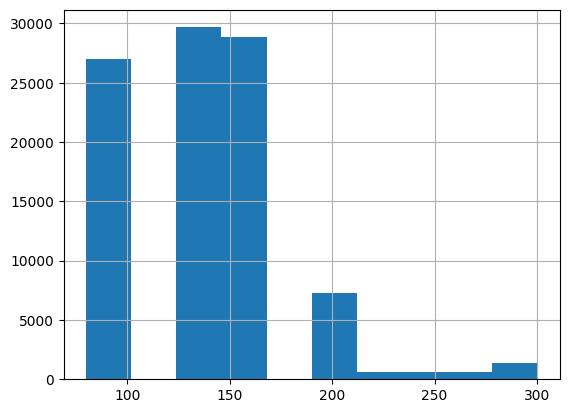

In [32]:
diabetes["blood_glucose_level"].hist()

In [33]:
# We are going to identify the outliers showed on the boxplot for blood_glucose_level (upper whisker)

blood_glucose_higher = diabetes[diabetes["blood_glucose_level"] > 247.50]
blood_glucose_higher_count = blood_glucose_higher.value_counts().sum()

print(f'Total hight outlier blood_glucose_level {blood_glucose_higher_count}')

total_dataset = (diabetes.value_counts().sum())
blood_glucose_outliers_perc = (blood_glucose_higher_count / total_dataset) * 100
print(f"Percentage of outliers in the blood_glucose_level column: {blood_glucose_outliers_perc:.2f}%")

print(blood_glucose_higher)


Total hight outlier blood_glucose_level 2031
Percentage of outliers in the blood_glucose_level column: 2.11%
       gender   age  hypertension  heart_disease smoking_history    bmi  \
38       Male  50.0             1              0         current  27.32   
94     Female  60.0             0              0           never  27.32   
104    Female  80.0             1              0           never  27.32   
125    Female  77.0             0              0           never  31.70   
142    Female  80.0             0              0          former  21.97   
...       ...   ...           ...            ...             ...    ...   
99763  Female  50.0             0              0           never  35.91   
99826    Male  63.0             0              1         No Info  27.32   
99867    Male  64.0             1              0          former  33.12   
99938    Male  55.0             0              1          former  30.42   
99957  Female  61.0             0              0         No Info  

Glucose levels above 247.50 mg/dL (milligrams per deciliter) can indicate hyperglycemia, which is elevated blood sugar. Hyperglycemia is commonly associated with diabetes, particularly when it occurs consistently.

It's importan to understand how this values are correlated with another variables and validate with a domain specialist if we should keep them on the database or separate them, since they represent a different health condition (hyperglicemia) that can impact the results.



---



In [34]:
# Now that we have identified some outliers, we are going to analyze the correlation of our variables

diabetes.corr(numeric_only=True)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257305,0.238451,0.344797,0.106719,0.114317,0.264927
hypertension,0.257305,1.000000,0.119982,0.148111,0.081441,0.084834,0.195710
heart_disease,0.238451,0.119982,1.000000,0.061376,0.068140,0.070832,0.170711
bmi,0.344797,0.148111,0.061376,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.106719,0.081441,0.068140,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.114317,0.084834,0.070832,0.092543,0.171615,1.000000,0.424336
diabetes,0.264927,0.195710,0.170711,0.214932,0.406408,0.424336,1.000000


<ipython-input-35-5517f6f5361c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diabetes.corr(), annot=True , cmap="coolwarm")


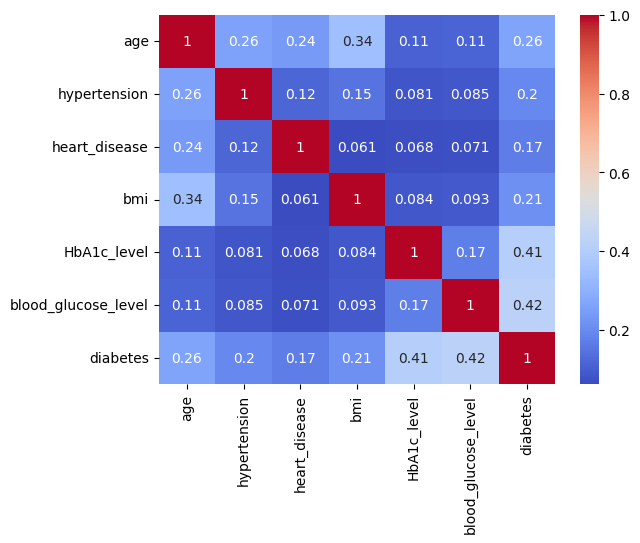

In [35]:
sns.heatmap(diabetes.corr(), annot=True , cmap="coolwarm")
plt.show()


Highest correlation (more than 0.30)

*   Column Age: it has a high correlation with bmi because age is used to determinate a bmi value.
*   Column Diabetes: there are a strong correlation between diabetes and HbA1c_level and blood_glucose_level






---



<Axes: xlabel='HbA1c_level', ylabel='blood_glucose_level'>

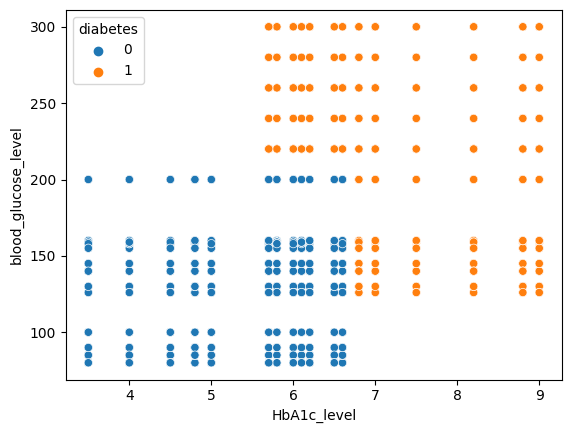

In [36]:
# This scatterplot show the correlation between HbA1c_level and blood_glucose_level accross diabetes column.
# We can identify a patter in the data, were higher levels of glucose and HbA1 have as a result diabetes 1 (positive cases)

sns.scatterplot(x="HbA1c_level", y='blood_glucose_level', hue='diabetes', data=diabetes)




<Axes: xlabel='age', ylabel='bmi'>

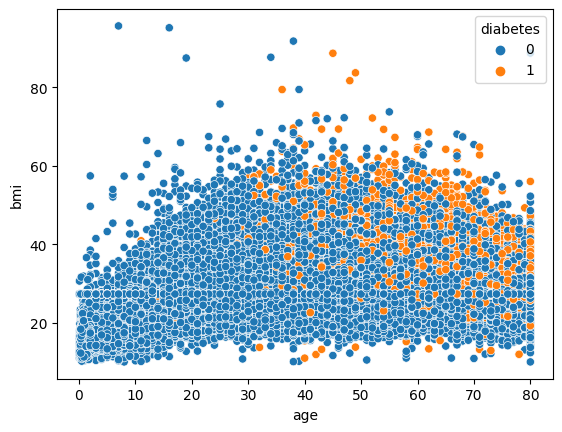

In [37]:
#In this other chart, we can see that there is a tendency for people above 40 and overweight (BMI > 30) to have diabetes
sns.scatterplot(x="age", y='bmi', hue='diabetes', data=diabetes)


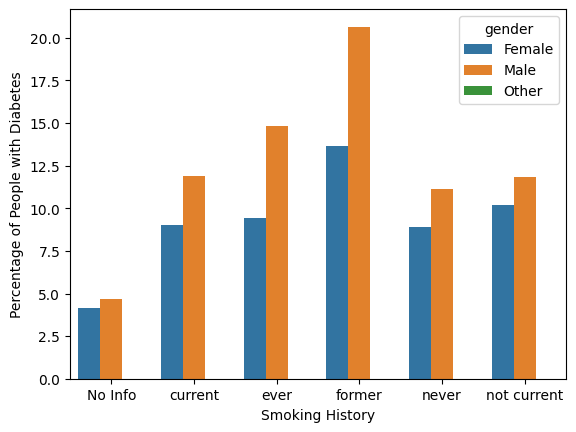

In [38]:
# We grouped the data by gender and smoking history and then displayed it with the variables gender and diabetes.
# Looking at the result, we can see that people who gave up smoking are more prone to get diabetis, and the males account for the higher percentage.
# It will worth to investigate further is people replace nicotine with sugar, since it's another source of dopamine.

gender_age = diabetes.groupby(["gender", "smoking_history"])["diabetes"].mean().reset_index()
gender_age["diabetes"] *= 100  # Convert proportion to percentage

sns.barplot(x="smoking_history", y="diabetes", hue="gender", data=gender_age)
plt.xlabel("Smoking History")
plt.ylabel("Percentage of People with Diabetes")
plt.show()


# Predictive Modeling

Firtsly, I'll chose some combination of varialbles to see which ones will be the best fit for my model



---



In [39]:
# Creating my training model for logistic regression

from statsmodels.formula.api import logit
from itertools import product
import numpy as np
import pandas as pd

diabetes_gluc_Hem = logit('diabetes ~ HbA1c_level * blood_glucose_level', data=diabetes).fit()

print(diabetes_gluc_Hem.params)


Optimization terminated successfully.
         Current function value: 0.145063
         Iterations 10
Intercept                         -34.225192
HbA1c_level                         4.262373
blood_glucose_level                 0.104845
HbA1c_level:blood_glucose_level    -0.011283
dtype: float64


In [40]:
conf_matrix = diabetes_gluc_Hem.pred_table()
print(conf_matrix)

# True Negative (TN): 87664 / Correctly predicted as the negative class (no diabetes).
# False Positive (FP): 0 / Incorrectly predicted as the positive class (predicted as having diabetes when they don't). No false positives in this case.
# False Negative (FN): 3777 / Incorrectly predicted as the negative class (predicted as not having diabetes when they do).
# True Positive (TP): 4705 / Correctly predicted as the positive class (having diabetes).

[[87664.     0.]
 [ 3777.  4705.]]


In [41]:
# Creating my training model with different variations

diabetes_gluc_Hem_age = logit('diabetes ~ HbA1c_level * blood_glucose_level * age', data= diabetes).fit()

print(diabetes_gluc_Hem_age.params)


Optimization terminated successfully.
         Current function value: 0.126001
         Iterations 11
Intercept                             -48.454925
HbA1c_level                             6.035087
blood_glucose_level                     0.154108
HbA1c_level:blood_glucose_level        -0.018698
age                                     0.294549
HbA1c_level:age                        -0.037115
blood_glucose_level:age                -0.001077
HbA1c_level:blood_glucose_level:age     0.000162
dtype: float64


In [42]:
conf_matrix = diabetes_gluc_Hem_age.pred_table()
print(conf_matrix)


# True Negative (TN): 87022 / Correctly predicted as the negative class (no diabetes).
# False Positive (FP): 642 / Incorrectly predicted as the positive class (predicted as having diabetes when they don't). No false positives in this case.
# False Negative (FN): 3361 / Incorrectly predicted as the negative class (predicted as not having diabetes when they do).
# True Positive (TP): 5121 / Correctly predicted as the positive class (having diabetes).

[[87022.   642.]
 [ 3361.  5121.]]


Using the confusion matrix, we can see that the best model include the HbA1c_level, blood_glucose_level and age. The model performed better when I added a relationship between HbA1c_level and blood_glucose_level, since these are hight correlated variables.





In [43]:
# Creating values for prediction - I'm considering the low/high values analized as outliers for each variable, so I'll keep my variables on that range.

from itertools import product

glucose = np.arange(160, 195, 1)
HbA1c = np.arange(5, 7.01, 0.01)
age_pred = np.arange(30, 62, 1)

combine = product(glucose,HbA1c,age_pred)

explanatory_data = pd.DataFrame(combine,columns=['glucose','HbA1c','age_pred'])
# _____________________________________________________

explanatory_data = explanatory_data.rename(columns={'glucose': 'blood_glucose_level', 'HbA1c': 'HbA1c_level', 'age_pred': 'age'})
# I had some issues running the prediction because I didn't use the same name column name we have in the diabetes dataframe, so I rename then to match.

explanatory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225120 entries, 0 to 225119
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   blood_glucose_level  225120 non-null  int64  
 1   HbA1c_level          225120 non-null  float64
 2   age                  225120 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 5.2 MB


In [44]:
# Using the model to make the predictions

diabetes_prediction = explanatory_data.assign(diabetes = diabetes_gluc_Hem_age.predict(explanatory_data))
print(diabetes_prediction)

diabetes_prediction.diabetes.head()

        blood_glucose_level  HbA1c_level  age  diabetes
0                       160          5.0   30  0.001370
1                       160          5.0   31  0.001464
2                       160          5.0   32  0.001564
3                       160          5.0   33  0.001672
4                       160          5.0   34  0.001786
...                     ...          ...  ...       ...
225115                  194          7.0   57  0.713768
225116                  194          7.0   58  0.723058
225117                  194          7.0   59  0.732159
225118                  194          7.0   60  0.741068
225119                  194          7.0   61  0.749782

[225120 rows x 4 columns]


0    0.001370
1    0.001464
2    0.001564
3    0.001672
4    0.001786
Name: diabetes, dtype: float64

When analysing the predictions, I realize that the values of the column "diabetes" were not anymore 1 or 0. We could set a scale where we determinate that a value is 0 or 1 when reach certaing threshold, like 0 > 0.5 < 1

In [45]:
diabetes_prediction['diabetes_class'] = (diabetes_prediction['diabetes'] >= 0.5).astype(int)
print(diabetes_prediction)

print(diabetes_prediction.diabetes_class.value_counts())



        blood_glucose_level  HbA1c_level  age  diabetes  diabetes_class
0                       160          5.0   30  0.001370               0
1                       160          5.0   31  0.001464               0
2                       160          5.0   32  0.001564               0
3                       160          5.0   33  0.001672               0
4                       160          5.0   34  0.001786               0
...                     ...          ...  ...       ...             ...
225115                  194          7.0   57  0.713768               1
225116                  194          7.0   58  0.723058               1
225117                  194          7.0   59  0.732159               1
225118                  194          7.0   60  0.741068               1
225119                  194          7.0   61  0.749782               1

[225120 rows x 5 columns]
0    215765
1      9355
Name: diabetes_class, dtype: int64


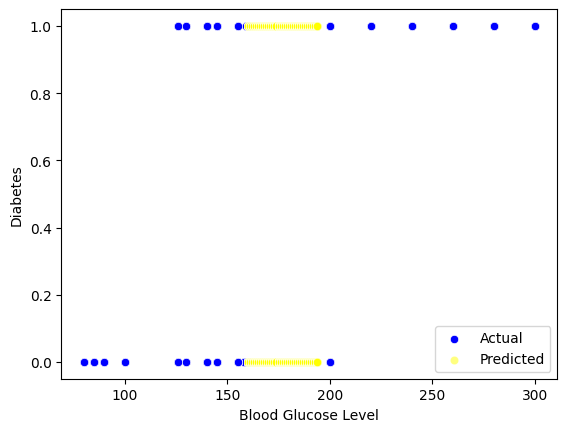

In [46]:
# I tried to plot the prediction to compare it with the current database, but using three variables is more complex, so I pick only two to demostrate.

data = diabetes[['blood_glucose_level', 'diabetes']]
prediction = diabetes_prediction[['blood_glucose_level', 'diabetes_class']]

sns.scatterplot(data=data, x='blood_glucose_level', y='diabetes', color='blue', label='Actual')
sns.scatterplot(data=prediction, x='blood_glucose_level', y='diabetes_class', color='yellow', alpha=0.5, label='Predicted')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes')
plt.show()

In [47]:
# To validate how good is our prediction, we won't use mean squared error (MSE) or R-squared since this is a logistic regression with a categorial variable (diabetes Y/N) - Classification model

from sklearn.metrics import accuracy_score

# when comparing the dataframe with their prediction, we need to be sure both df are the same lenght
diabetes_prediction_aligned = diabetes_prediction[:len(diabetes)]

y_true = diabetes['diabetes']
y_pred = diabetes_prediction_aligned['diabetes_class']

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9011399330185343




---



In [48]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<Axes: xlabel='bmi', ylabel='age'>

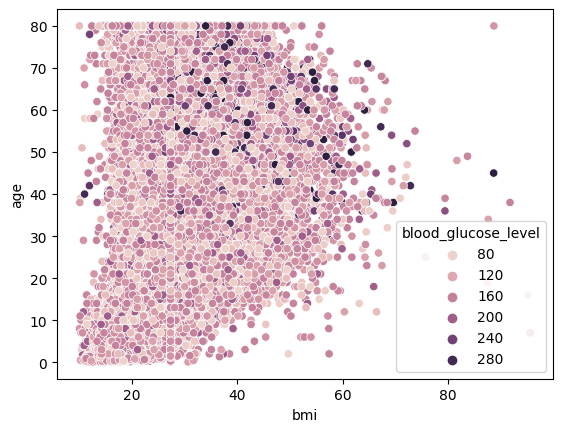

In [49]:
# We are going to make a linear regresion chosing some numerical variables

sns.scatterplot(x="bmi", y='age', hue='blood_glucose_level', data=diabetes)


In [50]:
# OLS is used when the target is continuos, while LOGIT is when the target has values 0 - 1 (binary - categorical)

from statsmodels.formula.api import ols

regression = ols('blood_glucose_level ~ age * bmi  + 0' , data= diabetes).fit()

print(regression.params)

age        2.440092
bmi        5.076199
age:bmi   -0.087741
dtype: float64


In [51]:
# The R-squared result indicates that 90.5% of the variance in out independent variable blood_glucose_level is explained but the independent variables age and bmi

print(regression.rsquared)

0.9053400661407343


In [54]:
# Creating or dataframe with explanatory data
age = np.arange(30,51, 1)
bmi = np.arange(25,35.5,0.5)

combinations_linear = product(age,bmi)
explanatory_linear= pd.DataFrame(combinations_linear, columns=['age','bmi'])

In [57]:
# Make the predictions using the dataframe with exploratory data

predictions_linear = explanatory_linear.assign(blood_glucose_level = regression.predict(explanatory_linear))
print(predictions_linear)


     age   bmi  blood_glucose_level
0     30  25.0           134.301694
1     30  25.5           135.523672
2     30  26.0           136.745651
3     30  26.5           137.967629
4     30  27.0           139.189608
..   ...   ...                  ...
436   50  33.0           144.745879
437   50  33.5           145.090444
438   50  34.0           145.435008
439   50  34.5           145.779573
440   50  35.0           146.124138

[441 rows x 3 columns]


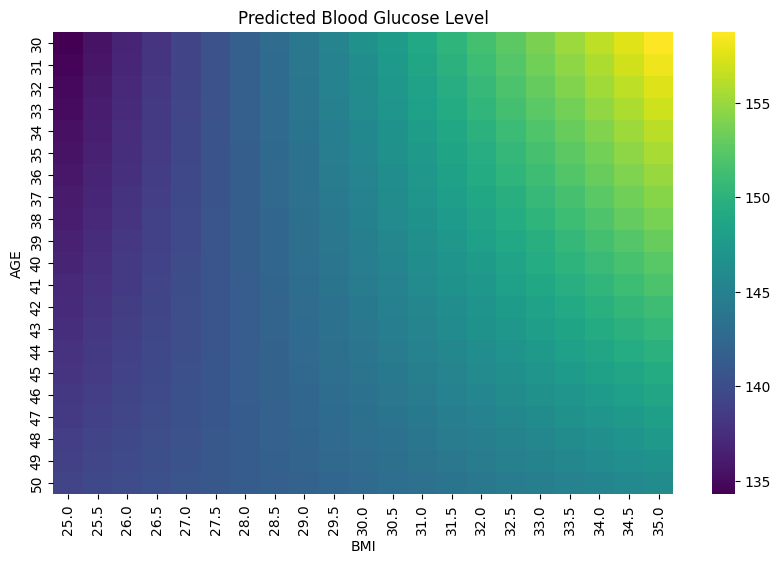

In [73]:
# To visualize the predicted data, I created a plot using heatmap with grid
# We can distinguish on this prediction how the bmi has a higher impact than age on the blood glucose level, since the higher values are in the upper left corner (higher BMI lower age)

grid = predictions_linear.pivot(index='age', columns='bmi', values='blood_glucose_level')

# Contour plot
plt.figure(figsize=(10, 6))
sns.heatmap(grid, cmap='viridis')
plt.title('Predicted Blood Glucose Level')
plt.xlabel('BMI')
plt.ylabel('AGE')
plt.show()


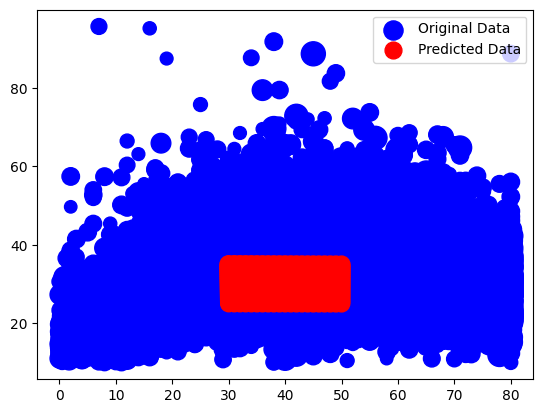

In [76]:
# We now are going to compare our original data vs our predicted data

fig, ax = plt.subplots()

# diabetes data
ax.scatter(diabetes['age'], diabetes['bmi'], diabetes['blood_glucose_level'], color='blue', label='Original Data')

# predicted data
ax.scatter(predictions_linear['age'], predictions_linear['bmi'], predictions_linear['blood_glucose_level'], color='red', label='Predicted Data')

ax.legend()
plt.show()

Looking at the comparion of my predicted data and the original database, it seems the range used was too small and not a good fit

In [89]:

# new explanatory data range
age = np.arange(15,80, 1)
bmi = np.arange(18,40.5,0.5)

new_combinations_linear = product(age,bmi)
new_explanatory_linear= pd.DataFrame(new_combinations_linear, columns=['age','bmi'])

In [90]:
# Make the predictions using the new dataframe with exploratory data

new_predictions_linear = new_explanatory_linear.assign(blood_glucose_level = regression.predict(new_explanatory_linear))
print(new_predictions_linear)

      age   bmi  blood_glucose_level
0      15  18.0           104.282786
1      15  18.5           106.162825
2      15  19.0           108.042864
3      15  19.5           109.922903
4      15  20.0           111.802942
...   ...   ...                  ...
2920   79  38.0           122.263190
2921   79  38.5           121.335505
2922   79  39.0           120.407820
2923   79  39.5           119.480134
2924   79  40.0           118.552449

[2925 rows x 3 columns]


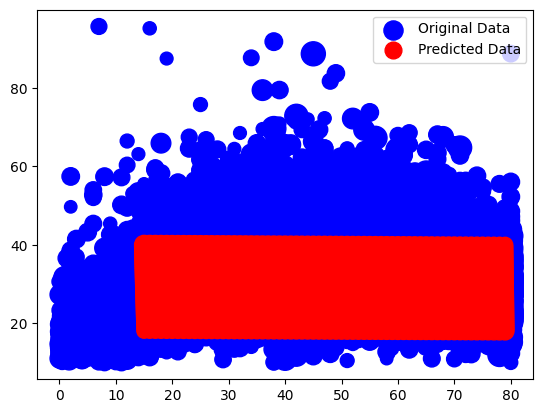

In [91]:
fig, ax = plt.subplots()

# diabetes data
ax.scatter(diabetes['age'], diabetes['bmi'], diabetes['blood_glucose_level'], color='blue', label='Original Data')

# predicted data
ax.scatter(new_predictions_linear['age'], new_predictions_linear['bmi'], new_predictions_linear['blood_glucose_level'], color='red', label='Predicted Data')

ax.legend()
plt.show()

  Expanding the range of our prediction, we have a small improvement. The values didn't change significantly because I'm using values that are between the interquartile range and also this two variables (age - bmi), that perhaps don't cover in the best way the changes on the glucose levels. I imagine that another issue is that I'm trying to predict data that already exist withing the database, for that reason the prediction gets contained.


---

One of the main challenges encontered during this assigment is train the critical thinking to analyse the data in a way that makes senses and add value.
I believe this is matter of practising and is even more important that memorize the libraries and code to perform the queries.

